In [8]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
tasks = pd.read_csv("./open_v2/task.csv")
agvs = pd.read_csv("./open_v2/agv.csv")

In [16]:

# Preprocessing
task_ids = tasks["task_id"].tolist()
task_coords = {row["task_id"]: (row["x"], row["y"]) for _, row in tasks.iterrows()}
task_service_time = dict(zip(tasks["task_id"], tasks["service_time"]))
task_demand = dict(zip(tasks["task_id"], tasks["demand"]))
task_deadline = dict(zip(tasks["task_id"], tasks["deadline"]))

agv_ids = agvs["agv_id"].tolist()
agv_speed = dict(zip(agvs["agv_id"], agvs["speed_cells_per_sec"]))
agv_capacity = dict(zip(agvs["agv_id"], agvs["capacity"]))
agv_max_distance = dict(zip(agvs["agv_id"], agvs["max_distance"]))

nodes = ['depot'] + task_ids
coords = {'depot': (0, 0), **task_coords}
dist = {(i, j): abs(coords[i][0] - coords[j][0]) + abs(coords[i][1] - coords[j][1])
        for i in nodes for j in nodes if i != j}


In [25]:
agv_max_distance

{'A001': 878,
 'A002': 875,
 'A003': 864,
 'A004': 787,
 'A005': 867,
 'A006': 837,
 'A007': 767,
 'A008': 452,
 'A009': 564,
 'A010': 568,
 'A011': 549,
 'A012': 770,
 'A013': 611,
 'A014': 772,
 'A015': 931}

In [15]:
dist

{('depot', 'T0001'): 55,
 ('depot', 'T0002'): 40,
 ('depot', 'T0003'): 16,
 ('depot', 'T0004'): 61,
 ('depot', 'T0005'): 48,
 ('depot', 'T0006'): 93,
 ('depot', 'T0007'): 83,
 ('depot', 'T0008'): 59,
 ('depot', 'T0009'): 68,
 ('depot', 'T0010'): 35,
 ('depot', 'T0011'): 53,
 ('depot', 'T0012'): 65,
 ('depot', 'T0013'): 42,
 ('depot', 'T0014'): 26,
 ('depot', 'T0015'): 46,
 ('depot', 'T0016'): 40,
 ('depot', 'T0017'): 49,
 ('depot', 'T0018'): 73,
 ('depot', 'T0019'): 22,
 ('depot', 'T0020'): 34,
 ('depot', 'T0021'): 20,
 ('depot', 'T0022'): 62,
 ('depot', 'T0023'): 93,
 ('depot', 'T0024'): 49,
 ('depot', 'T0025'): 80,
 ('depot', 'T0026'): 56,
 ('depot', 'T0027'): 64,
 ('depot', 'T0028'): 63,
 ('depot', 'T0029'): 60,
 ('depot', 'T0030'): 72,
 ('depot', 'T0031'): 73,
 ('depot', 'T0032'): 47,
 ('depot', 'T0033'): 42,
 ('depot', 'T0034'): 62,
 ('depot', 'T0035'): 60,
 ('depot', 'T0036'): 77,
 ('depot', 'T0037'): 65,
 ('depot', 'T0038'): 54,
 ('depot', 'T0039'): 31,
 ('depot', 'T0040'): 27,


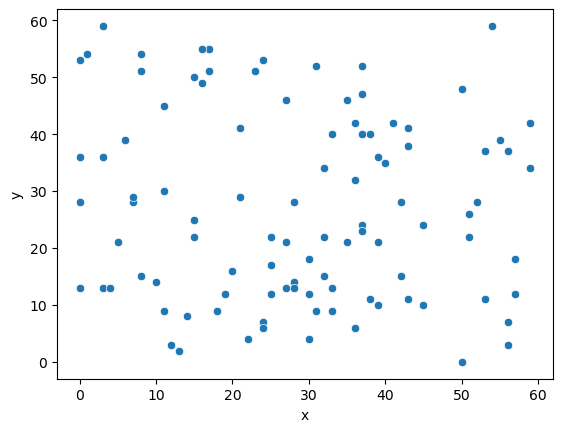

In [9]:
sns.scatterplot(data = tasks, x = 'x', y = 'y')
plt.show()

In [5]:
tasks['demand'].sum()

np.int64(214)

In [6]:
agvs['capacity'].sum()

np.int64(81)